# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
from sympy import *
from scipy.misc import derivative

x = symbols('x')
f = (tan(sin(x) + cos(2*x+3)))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
# вычисление производной вручную

2*tan(sin(x) + cos(2*x+3)) * 1/(cos(sin(x) + cos(2*x+3)))**2 * (cos(x) - sin(2*x+3) * 2)

2*(-2*sin(2*x + 3) + cos(x))*tan(sin(x) + cos(2*x + 3))/cos(sin(x) + cos(2*x + 3))**2

In [ ]:
# вычисление через diff

dif = diff(f, x)
dif

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
x0 = 1
dif.evalf(subs={x: x0})

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

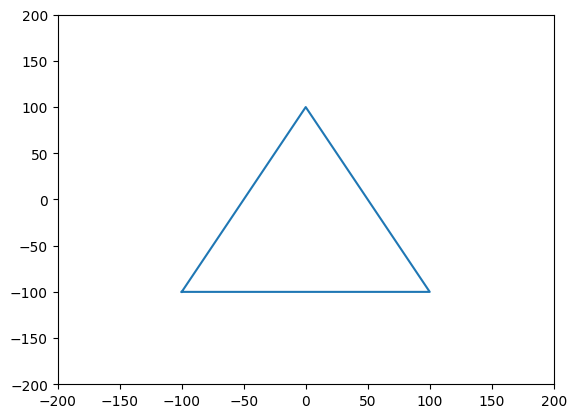

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

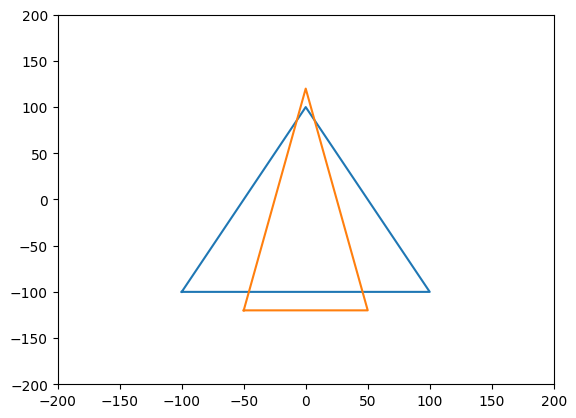

In [ ]:
# масштабирование

m = [0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]
m = np.array(m)

res = np.matmul(A, m)

plt.plot(x, y)

x1 = res[:,0]
y1 = res[:,1]
plt.plot(x1, y1)

plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-200.0, 600.0)

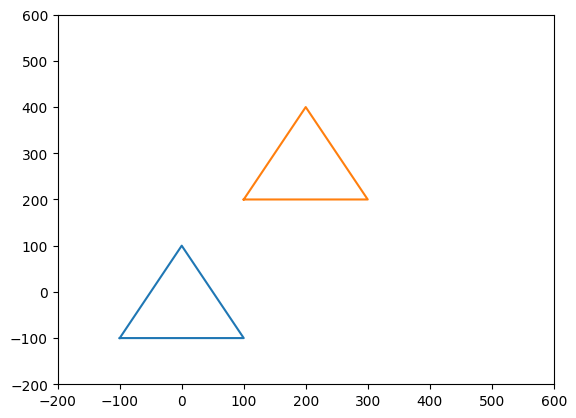

In [ ]:
# смещение

m = [[1, 0, 0], [0, 1, 0], [200, 300, 1]]
m = np.array(m)

res = np.matmul(A, m)

plt.plot(x, y)

x1 = res[:,0]
y1 = res[:,1]
plt.plot(x1, y1)

plt.ylim([-200, 600])
plt.xlim([-200, 600])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
res = np.linalg.eig(m)
res

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [ ]:
# собственные значения

res[0]

array([ 3., -1.])

In [ ]:
# собственные вектора

res[1]

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

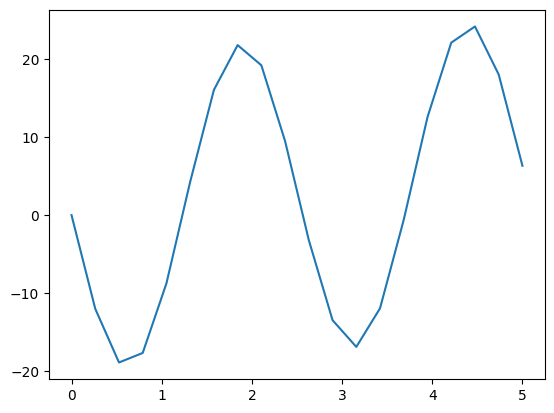

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
from scipy.optimize import curve_fit

a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)

min_err = float(np.inf)
params = []

for a in a_range:
    for b in b_range:
      res = curve_fit(f, x, fx, [a, b])
      err = error(res[0])

      if err < min_err:
        min_err = err
        params = res[0]

print(f'a = {params[0]}\nb = {params[1]}\nerror = {min_err}')

a = 3.0000000005122343
b = -2.4999999994806203
error = 1.5365207568507344e-06


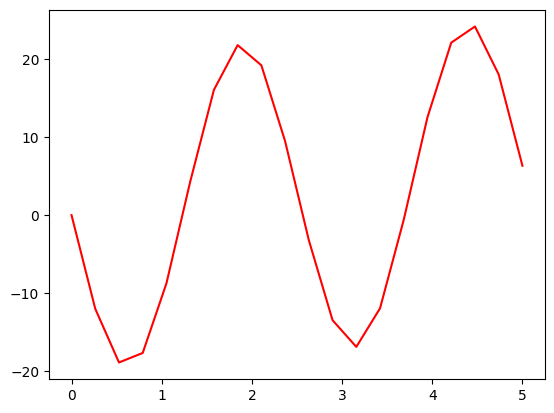

In [ ]:
plt.plot(x, f(x, params[0], params[1]), color='red')
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
users = {}

for x_i, x in enumerate(raitings):
  max_cos_sim = 0
  best_user = ''
  for y_i, y in enumerate(raitings):
    cos_sim = x.dot(y) / (np.linalg.norm(x) * np.linalg.norm(y))
    if (cos_sim > max_cos_sim) and x_i != y_i:
      max_cos_sim = cos_sim
      best_user = y_i
  users[x_i] = [best_user, max_cos_sim]

for x, y in users.items():
  print(f'({x}, {y[0]})')

(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)
